In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report

import nltk
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Step 2: Load the Dataset

In [2]:
data = pd.read_csv('news_dataset.csv')
data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [3]:
data['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [4]:
data.shape

(72134, 4)

In [5]:
data.tail()

Unnamed: 0                                              title  \
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

In [6]:
data['text'][72131]

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

#Step 3: Handle Null Values and Separate Features from Labels

In [10]:
data.fillna(' ', inplace=True)
features = data[['title', 'text']]
labels = data['label']

In [11]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
                values=quantity,
                names=transactions, hole = .60,
                title="Spam & Ham Status")
figure.show()

In [13]:
data.shape

(72134, 3)

#Step 4: Create Words Clouds

In [14]:
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

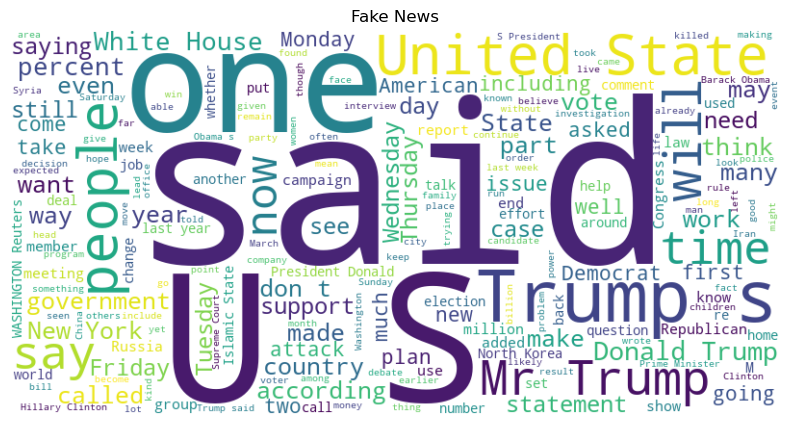

In [15]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

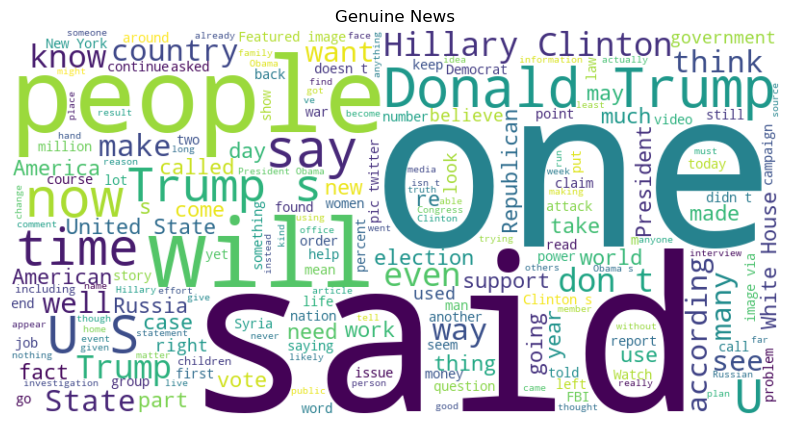

In [16]:
plot_wordcloud(real_text, 'Genuine News')
plt.show()

#Step 5: Text Preprocessing

In [17]:
text_column = 'text'
label_column = 'label'

In [18]:
english_stopwords = set(stopwords.words('english'))
english_punctuation = set(string.punctuation)

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def preprocess_text(text):
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc)
    words = clean_text.split()
    text = ([word for word in words if word.lower() not in english_stopwords])
    return text   

In [31]:
data[text_column] = data[text_column].apply(preprocess_text)

In [32]:
data[text_column]

0        [N, c, e, n, e, x, p, e, c, e, f, r, B, r, c, ...
1        [h, e, p, h, e, r, v, e, f, r, H, l, l, r, l, ...
2        [N, w, f, h, e, e, n, r, r, g, h, e, r, e, l, ...
3        [z, e, n, p, l, c, l, l, c, v, e, p, r, c, e, ...
4        [h, e, R, 2, 8, r, l, e, u, b, b, e, n, 2, w, ...
                               ...                        
72129    [W, H, N, G, N, R, e, u, e, r, H, c, k, e, r, ...
72130    [u, k, n, w, b, e, c, u, e, n, f, n, l, n, R, ...
72131    [g, r, n, R, e, f, u, e, L, e, v, e, r, n, R, ...
72132    [E, X, C, C, R, e, u, e, r, n, l, r, u, p, ’, ...
72133    [G, l, n, c, h, E, n, r, e, H, l, l, r, C, l, ...
Name: text, Length: 72134, dtype: object

In [23]:
data[text_column][0]

['N',
 'c',
 'e',
 'n',
 'e',
 'x',
 'p',
 'e',
 'c',
 'e',
 'f',
 'r',
 'B',
 'r',
 'c',
 'k',
 'b',
 'e',
 'b',
 'e',
 'r',
 'f',
 'h',
 'e',
 'F',
 'F',
 '9',
 '1',
 '1',
 'r',
 'F',
 'u',
 'k',
 'F',
 'l',
 'g',
 'n',
 'B',
 'l',
 'c',
 'k',
 'L',
 'v',
 'e',
 'e',
 'r',
 'v',
 'e',
 'e',
 'n',
 'c',
 'l',
 'l',
 'e',
 'f',
 'r',
 'h',
 'e',
 'l',
 'n',
 'c',
 'h',
 'n',
 'g',
 'n',
 'h',
 'n',
 'g',
 'n',
 'g',
 'f',
 'w',
 'h',
 'e',
 'p',
 'e',
 'p',
 'l',
 'e',
 'n',
 'c',
 'p',
 'h',
 'e',
 'e',
 'n',
 'c',
 'u',
 'r',
 'g',
 'e',
 'h',
 'e',
 'r',
 'n',
 'r',
 'h',
 'w',
 'u',
 'e',
 'n',
 'g',
 'h',
 'u',
 'r',
 'n',
 'h',
 'e',
 'e',
 'n',
 'k',
 'l',
 'l',
 'w',
 'h',
 'e',
 'p',
 'e',
 'p',
 'l',
 'e',
 'n',
 'c',
 'p',
 'e',
 'n',
 'e',
 'g',
 'e',
 'b',
 'u',
 'h',
 'e',
 'k',
 'l',
 'l',
 'n',
 'g',
 'f',
 'b',
 'l',
 'c',
 'k',
 'p',
 'e',
 'p',
 'l',
 'e',
 'n',
 'e',
 'r',
 'c',
 'n',
 'e',
 'f',
 'h',
 'e',
 'F',
 'F',
 'l',
 'g',
 'r',
 'g',
 'n',
 'z',
 'e',
 'r'

#Step 6: Lemmatization

In [33]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ''.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [34]:
data[text_column]

0        NcenexpecefrBrckbeberfheFF911rFukFlgnBlckLveer...
1                                        hephervefrHllrlre
2        Nwfheenrrgherelnghwereexercnghercnunlnprecergh...
3        zenplcllcveprceherefrprvennerFrnghhercnvernrun...
4        heR28rleubben2wllreplcehe18Fle43le7kperecnwhrn...
                               ...                        
72129    WHNGNReuerHckerbelevebewrkngfrheRungvernenbrke...
72130    uknwbecuenfnlnRepublcnneverqueneheczenhpfercfr...
72131    grnRefueLevernRefugeeCpnHungrhunfgrnflenrnnnhe...
72132    EXCCReuernlrup’cbvelehbuffeeexc’preenfrnhbueep...
72133    GlnchEnreHllrClnnFrPreenFrGlnchwhererellnherch...
Name: text, Length: 72134, dtype: object

In [35]:
data[text_column][0]

'NcenexpecefrBrckbeberfheFF911rFukFlgnBlckLveerveencllefrhelnchngnhngngfwhepeplencpheencurgehernrhwuenghurnheenkllwhepeplencpenegebuhekllngfblckpeplenercnefheFFlgrgnzerclleunhnehehrblghwhefrexclleunhneFngpnnRhwnphfherFF911LLWheFerwerpge953phwhhewurgngupprerCllnwff911nghwecnnuenlehellunfwheBelwNPHwerRCllnveFF911herhwre1000peernnreurnghehwcllerclerlcllfrlnchngnkllngfwhepeple239nueclpfrherhwcnbeherherewprveBrebrexbenewhwullkebereferreHnnblHehlrereceveehhrereulfnerrupngFF911cnferencecllnunenfeblcknwhenheherfkerrebheelvehwhenwhenwehulrfngheupLkeheuwhenbunchfhenerknnefuuhhwwehulrllupHeCuewelrerllupngngnwherehulbexrevenblckherfckereehwhepernnhenlnchherLeurnheblehecnprehfcprelngpeplehenherewllbeefeergencHepeculehnefwhngwulhppenbgRwrrnerheregngrbcknupWerelregengklleuherewhhefkwegleunhneculbeherngephruehfkngrueHeWeneeurnheblenheurkregenghuhereebneebececrfcenhereHeEverbnwnfrhrwheverbulkeeverbhfferenpnfwrHecnnueBecuehengvefknwHegnWeghwellulzehefrhnurnheblenheenerHehwwecnrlknlkewenhvnhnculenherecnb

#Step 7: TF-IDF Vectorazation

In [36]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [37]:
x

<72134x798097 sparse matrix of type '<class 'numpy.float64'>'
	with 1017211 stored elements in Compressed Sparse Row format>

#Step 8: Split Data set into Training and Testing set

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.3, random_state=42)


In [40]:
xtrain.shape

(50493, 798097)

In [41]:
xtest.shape

(21641, 798097)

In [42]:
ytest.shape

(21641,)

#Step 9: Evaluation Naive Bayes Models

In [44]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }    

#Step 10: Build Naive Bayes Model

In [46]:
mnb_model = MultinomialNB()
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [47]:
from sklearn.metrics import precision_recall_curve, auc

In [49]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.6703941592347858,
 'Confusion Matrix': array([[ 3711,  6902],
        [  231, 10797]], dtype=int64)}

#Evaluate Manually

In [50]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[ 3711,  6902],
       [  231, 10797]], dtype=int64)

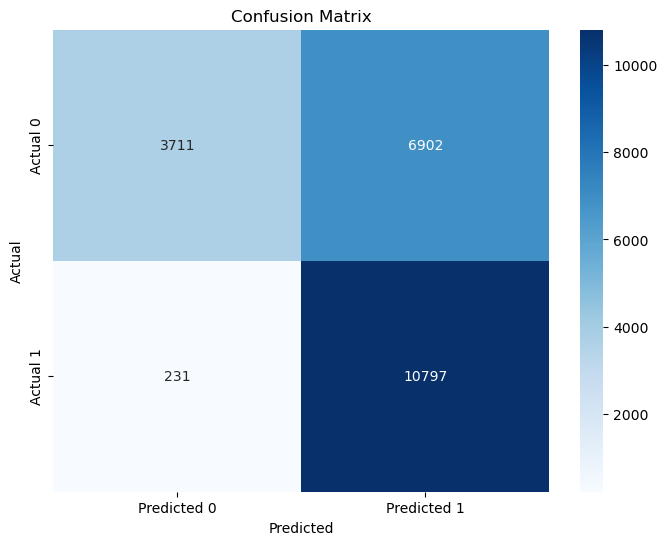

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(classification_report(ytest, mnb_model.predict(xtest)))


              precision    recall  f1-score   support

           0       0.94      0.35      0.51     10613
           1       0.61      0.98      0.75     11028

    accuracy                           0.67     21641
   macro avg       0.78      0.66      0.63     21641
weighted avg       0.77      0.67      0.63     21641



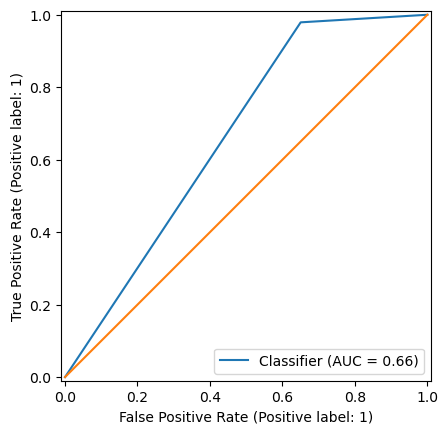

In [55]:
RocCurveDisplay.from_predictions(ytest, mnb_model.predict(xtest))
plt.plot([0 ,1], [0, 1])
plt.show()

In [56]:
#Bernoulli Naive Bayes